<a href="https://colab.research.google.com/github/kjmobile/lb/blob/main/8_Ensemble_Learning_Random_Forest_and_Boosting_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble of Decision Trees



## Bagging
A method that combines the predictions of multiple independent weak learners to form a more robust model through parallel training and averaging the results.

 Bootstrapping is used to train each tree on a different data sample, leading to diverse trees that, when combined, reduce variance and improve **generalization**.

 It also prevents overfitting by learning from only a portion of the data, while the random selection of features at each node reduces correlation between trees, resulting in **less overfitting**.


## Random Forest

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine=pd.read_csv('https://raw.githubusercontent.com/kjmobile/data/main/ml/wine_csv.csv')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=17)

In [30]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=17)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1) #default 5-fold cv

print(np.mean(scores['train_score']), np.mean(scores['test_score'])) # some overfitting is shown

0.9980758013714472 0.8864707188865033


In [34]:
rf?

In [31]:
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [32]:
rf.fit(train_input, train_target)
print(rf.feature_importances_) #sugar is most important

[0.22986133 0.50020073 0.26993794]


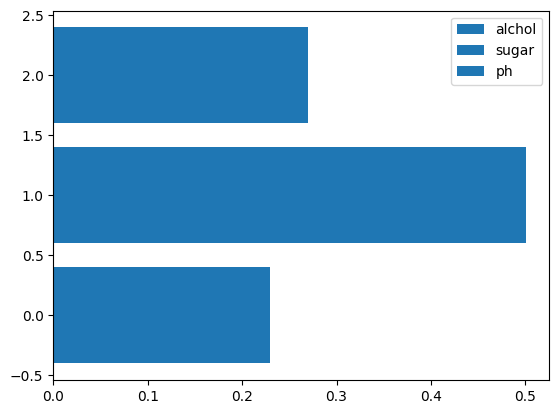

In [33]:
import matplotlib.pyplot as plt
plt.barh(y=range(3), width=rf.feature_importances_, label=['alchol', 'sugar','ph'])
plt.legend()

In [ ]:
# What is the 'default' number of trees in random forest?
RandomForestClassifier?

Random forests create bootstrapped samples by allowing duplicates from the training set to train decision trees.

There are samples that do not get included in these bootstrapped samples, known as **Out-Of-Bag (OOB) samples**.

These samples can be used to evaluate the trees that were trained on the bootstrapped samples, acting similarly to a validation set!

Using the OOB score can replace the need for cross-validation, allowing for the use of more samples in the training set

In [9]:
# Evaluating the performance using oob_score =True instead of using cv.
# It allows using more samples for training
rf1 = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=17)

rf1.fit(train_input, train_target)
print(rf1.oob_score_)

0.8962863190302097


In [10]:
# compare the oob_score with train score and test score
print(rf1.score(train_input, train_target))
print(rf1.score(test_input, test_target))


0.9976909755628247
0.9007692307692308


When making predictions for classification, the random forest aggregates the predictions of all individual trees. Each tree gives a class probability estimate, and the forest takes the average of these probabilities across all trees for each class (i.e.,soft-voting)

# Boosting

A method that sequentially combines multiple weak learners into a strong learner by iteratively adjusting the weights of training instances to focus on difficult cases.

# Adaptive Boosting


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=500, learning_rate=0.1,algorithm='SAMME', random_state=17) #default n_estimator is 50
scores = cross_validate(ada, train_input, train_target, return_train_score=True, n_jobs=-1) #default k=5
ada.fit(train_input, train_target)

print(f'Train Score: {np.mean(scores["train_score"])}, Test Score: {np.mean(scores["test_score"])}')
print(f'Feature Importances: {ada.feature_importances_}')

#The default base learner in AdaBoost is a DecisionTreeClassifier with max_depth=1, we used a decision stump with slightly less weak by setting it 2.


C:\Users\leek27\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Train Score: 0.8678083977338247, Test Score: 0.859150255423114
Feature Importances: [0.04278414 0.80740946 0.14980641]


## Gradient Boosting

In [48]:
gb?

In [50]:
gb = GradientBoostingClassifier(random_state=17)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
#used the default gb model (maxdepth=3) to get the fiture_importances
gb.fit(train_input, train_target)
print(gb.feature_importances_)

0.8865213413445311 0.8687706374472496
[0.13611058 0.72507684 0.13881258]


In [51]:
from sklearn.ensemble import GradientBoostingClassifier

gb1 = GradientBoostingClassifier(max_depth=4, random_state=17)
scores = cross_validate(gb1, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
gb.fit(train_input, train_target)
print(gb.feature_importances_)
# method to pass the max_depth is not the same as as adaBost.

0.9031173274377509 0.8708871325979122
[0.13611058 0.72507684 0.13881258]


<style>
.cell {
  font-family: "times new roman";
}


Initialize weights for each data point $i$:
$$w_i = \frac{1}{m} \quad \text{for} \quad i = 1, 2, \ldots, m.$$

For the error $ r_j \text{ of } h_j(x)$:

$$r_j = \frac{\sum_{i=1}^m w_i \cdot \mathbf{1}_{(h_j(x_i) \neq y_i)}}{\sum_{i=1}^m w_i}$$


For the predictor weight $\alpha_j$:

$$ \alpha_j = \eta \log \left( \frac{1 - r_j}{r_j} \right) $$


For updating the weights for each data point $i$:

$$
w_i \leftarrow
\begin{cases}
w_i & \text{if } h_j(x_i) = y_i, \\
w_i \exp(\alpha_j) & \text{otherwise}
\end{cases}
$$


For the final prediction for a new data point $x$:
$$ \hat{y}(x) = \underset{k}{\operatorname{argmax}} \sum_{j=1}^N \alpha_j \cdot \mathbf{1}_{(h_j(x) = k)}$$
</style>